In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 한글 폰트
plt.rcParams['axes.unicode_minus'] = False       # 마이너스 기호 깨짐 방지

import warnings
warnings.filterwarnings('ignore')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

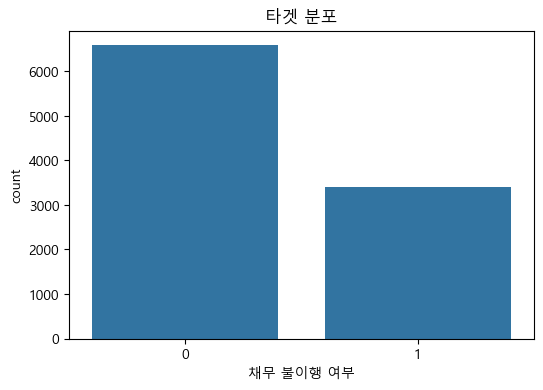

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 (제출 시 경로는 '/data' 사용)
train = pd.read_csv('/data/train.csv', index_col=False)
test = pd.read_csv('/data/test.csv', index_col=False)

print(train.info())
print(train.describe())

import numpy as np

# UID 컬럼은 미리 복사 후 제거 (test 데이터)
id_col = 'UID'
test_ids = test[id_col].copy()
test = test.drop([id_col], axis=1)

# (옵션) train 데이터에 UID가 있다면 제거 – 보통 학습에 필요 없으므로
train = train.drop([id_col], axis=1)

# 타겟 분포 시각화
target = '채무 불이행 여부'
plt.figure(figsize=(6,4))
sns.countplot(x=target, data=train)
plt.title("타겟 분포")
plt.show()


In [3]:
train
# 주거 형태 - 원핫인코딩 -> 일부 변수 제거(중요도 확인)
# 연간 소득 - standard scaling
# 현재 직장 근속 연수 - 수치화 하기 (1년 미만 -> 0, 10년 이상 -> 15)
# 체납 세금 압류 횟수 - 
# 개설된 신용계좌 수 - 
# 신용 거래 연수 - 
# 최대 신용 한도 - standard scaling

,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,주택 담보 대출 (거주 중),1339473.0,10년 이상,0.0,9,18.7,319027.5,0,68,0,부채 통합,단기 상환,126216.0,177028.5,6237.0,755,0
9996,주택 담보 대출 (거주 중),2297230.5,2년,0.0,11,28.3,399799.5,0,7,0,주택 개보수,장기 상환,371907.0,347449.5,53301.0,707,0
9997,주택 담보 대출 (거주 중),1221523.5,10년 이상,0.0,9,30.1,823305.0,0,14,0,부채 통합,장기 상환,869736.0,176905.5,11436.0,733,0
9998,자가,3343584.0,10년 이상,0.0,10,20.3,724314.0,0,25,0,부채 통합,단기 상환,443008.5,139294.5,25567.5,696,0


In [4]:
import pandas as pd

# object형 컬럼 목록 확인
obj_cols = train.select_dtypes(include='object').columns
print("Object 형 컬럼들:", obj_cols)

# '현재 직장 근속 연수' 컬럼의 고유값 확인
print("현재 직장 근속 연수 고유값:")
print(train['현재 직장 근속 연수'].unique())

# 원핫 인코딩할 컬럼: UID와 '현재 직장 근속 연수'는 제외
onehot_cols = [col for col in obj_cols if col not in ['UID', '현재 직장 근속 연수']]
print("원핫 인코딩할 컬럼:", onehot_cols)

# 원핫 인코딩 적용: drop_first=True로 첫 번째 카테고리 제거 (다중공선성 방지)
train = pd.get_dummies(train, columns=onehot_cols, drop_first=True)
test = pd.get_dummies(test, columns=onehot_cols, drop_first=True)

target = '채무 불이행 여부'
X = train.drop(columns=[target])
y = train[target]


Object 형 컬럼들: Index(['주거 형태', '현재 직장 근속 연수', '대출 목적', '대출 상환 기간'], dtype='object')
현재 직장 근속 연수 고유값:
['10년 이상' '4년' '6년' '2년' '8년' '3년' '5년' '9년' '7년' '1년 미만' '1년']
원핫 인코딩할 컬럼: ['주거 형태', '대출 목적', '대출 상환 기간']


In [5]:
def convert_years(val):
    if val == '1년 미만':
        return 0
    elif val == '10년 이상':
        return 10
    else:
        # '4년', '6년' 등에서 '년'을 제거하고 정수형으로 변환
        return int(val.replace('년', ''))

# train, test 데이터에 대해 변환 적용
X['현재 직장 근속 연수'] = X['현재 직장 근속 연수'].apply(convert_years)
test['현재 직장 근속 연수'] = test['현재 직장 근속 연수'].apply(convert_years)

# 변환 결과 확인
print(X['현재 직장 근속 연수'].unique())


[10  4  6  2  8  3  5  9  7  0  1]


In [6]:
# # "주거 형태"로 시작하는 컬럼 이름 찾기
# exclude_cols = [col for col in X.columns if col.startswith('주거 형태')]
# print("제거할 컬럼:", exclude_cols)

# # train과 test 데이터셋에서 해당 컬럼 제거
# X_filtered = X.drop(columns=exclude_cols)
# test_filtered = test.drop(columns=exclude_cols)

# # 제거 후 컬럼 확인
# print("학습 데이터 컬럼:", X_filtered.columns)
# print("테스트 데이터 컬럼:", test_filtered.columns)


In [7]:
X_filtered = X
test_filtered = test

In [8]:
cols_to_drop = [col for col in X_filtered.columns if col.startswith('대출 목적') and col not in ['대출 목적_부채 통합', '대출 목적_기타', '대출 목적_의료비']]
print("제거할 컬럼:", cols_to_drop)

# train과 test 데이터셋 모두에서 해당 컬럼 제거
X_filtered = X_filtered.drop(columns=cols_to_drop)
test_filtered = test_filtered.drop(columns=cols_to_drop)


제거할 컬럼: ['대출 목적_고액 구매', '대출 목적_교육비', '대출 목적_사업 대출', '대출 목적_소규모 사업 자금', '대출 목적_여행 자금', '대출 목적_이사 비용', '대출 목적_자동차 구매', '대출 목적_주택 개보수', '대출 목적_주택 구매', '대출 목적_휴가 비용']


In [9]:
# # 로그 변환
# X_filtered['현재 대출 잔액'] = np.log1p(X_filtered['현재 대출 잔액'])
# X_filtered['현재 미상환 신용액'] = np.log1p(X_filtered['현재 미상환 신용액'])
# X_filtered['월 상환 부채액'] = np.log1p(X_filtered['월 상환 부채액'])
# X_filtered['최대 신용한도'] = np.log1p(X_filtered['최대 신용한도'])
# X_filtered['연간 소득'] = np.log1p(X_filtered['연간 소득'])

# test_filtered['현재 대출 잔액'] = np.log1p(test_filtered['현재 대출 잔액'])
# test_filtered['현재 미상환 신용액'] = np.log1p(test_filtered['현재 미상환 신용액'])
# test_filtered['월 상환 부채액'] = np.log1p(test_filtered['월 상환 부채액'])
# test_filtered['최대 신용한도'] = np.log1p(test_filtered['최대 신용한도'])
# test_filtered['연간 소득'] = np.log1p(test_filtered['연간 소득'])

In [10]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_filtered)
# test_scaled = scaler.fit_transform(test_filtered)

In [11]:
from imblearn.over_sampling import SMOTE

print("SMOTE 적용 전 학습 데이터 크기:", X_filtered.shape)
# 예시: 소수 클래스 샘플 수를 다수 클래스의 80%로 맞추기
smote = SMOTE(sampling_strategy=0.8, random_state=42)
X_filtered, y = smote.fit_resample(X_filtered, y)

print("SMOTE 적용 후 학습 데이터 크기:", X_filtered.shape)

SMOTE 적용 전 학습 데이터 크기: (10000, 20)
SMOTE 적용 후 학습 데이터 크기: (11858, 20)


In [12]:
# X = pd.DataFrame(X_scaled, columns=X_filtered.columns)

In [13]:
X_filtered

,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,주거 형태_자가,주거 형태_주택 담보 대출 (거주 중),주거 형태_주택 담보 대출 (비거주 중),대출 목적_기타,대출 목적_부채 통합,대출 목적_의료비,대출 상환 기간_장기 상환
0,1.941338e+06,10,0.000000,9,13.400000,4.005975e+05,0,24,1,3.909030e+05,225457.500000,8806.500000,767,True,False,False,False,True,False,False
1,1.979505e+06,10,0.000000,5,15.100000,3.606795e+05,0,11,0,1.002184e+06,64749.000000,24961.500000,767,False,False,False,False,True,False,False
2,1.356381e+06,4,0.000000,12,18.800000,4.917705e+05,1,74,3,2.277750e+05,487644.000000,12069.000000,800,False,False,False,False,True,False,False
3,1.049018e+06,6,0.000000,15,14.800000,4.115460e+05,1,22,1,2.513835e+05,413211.000000,31749.000000,796,False,False,False,False,True,False,False
4,4.320218e+06,2,0.000000,11,26.100000,8.952885e+05,0,32,0,1.163176e+06,78991.500000,5862.000000,751,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11853,1.797258e+06,8,3.606063,14,27.150009,1.393755e+06,1,41,1,3.653136e+05,242960.203048,7486.135762,757,False,False,False,False,True,False,False
11854,3.475704e+06,10,0.210781,23,16.890673,9.382343e+05,0,37,0,4.393826e+05,393176.675250,30410.392976,710,False,False,False,False,True,False,False
11855,2.028256e+06,9,0.000000,12,24.581470,7.929291e+05,0,19,0,5.042848e+05,112631.597073,16685.767613,738,True,True,False,True,True,False,True
11856,1.475575e+06,3,0.000000,18,11.804092,5.392462e+05,0,61,0,5.307160e+05,405756.759287,13224.132815,764,False,False,False,False,True,False,True


In [16]:
type(y)

pandas.core.series.Series

In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 클래스 비율 계산 (Series 활용)
scale_pos_weight = y.value_counts()[0] / y.value_counts()[1]
print("계산된 scale_pos_weight 값:", scale_pos_weight)

xgb_model = XGBClassifier(random_state=31, eval_metric='auc')
param_grid_xgb = {
    'max_depth': [15, 16],
    'learning_rate': [0.1, 0.07],
    'n_estimators': [160, 180],
    'scale_pos_weight': [scale_pos_weight, scale_pos_weight * 0.5]  # 튜닝 가능
}
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=1, verbose=1)
grid_search_xgb.fit(X_filtered, y)
print("XGB Best Params:", grid_search_xgb.best_params_)
print("Best CV ROC-AUC:", grid_search_xgb.best_score_)


계산된 scale_pos_weight 값: 1.2500948766603415
Fitting 5 folds for each of 16 candidates, totalling 80 fits
XGB Best Params: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 180, 'scale_pos_weight': np.float64(0.6250474383301707)}
Best CV ROC-AUC: 0.8094326281414622


In [19]:
test_pred = grid_search_xgb.predict_proba(test_filtered)[:, 1]  # 양성 클래스(채무 불이행)의 확률

submission = pd.DataFrame({
    'UID': test_ids,
    '채무 불이행 확률': test_pred
})

submission.to_csv('/data/submission.csv', index=False)
print("submission.csv 파일이 '/data' 경로에 저장되었습니다.")

submission.csv 파일이 '/data' 경로에 저장되었습니다.


In [20]:
submission[submission['채무 불이행 확률'] < 0.5]

,UID,채무 불이행 확률
0,TEST_0000,0.144415
1,TEST_0001,0.078841
2,TEST_0002,0.038113
3,TEST_0003,0.197978
4,TEST_0004,0.063327
...,...,...
2056,TEST_2056,0.394312
2057,TEST_2057,0.008350
2058,TEST_2058,0.349089
2059,TEST_2059,0.466216


                   feature  importance
17             대출 목적_부채 통합    0.497893
19          대출 상환 기간_장기 상환    0.097277
16                대출 목적_기타    0.067765
2              체납 세금 압류 횟수    0.045255
1              현재 직장 근속 연수    0.025836
3               개설된 신용계좌 수    0.025735
8                 개인 파산 횟수    0.023641
6              신용 문제 발생 횟수    0.019182
13                주거 형태_자가    0.018752
0                    연간 소득    0.018670
12                   신용 점수    0.017767
9                 현재 대출 잔액    0.017533
18               대출 목적_의료비    0.017334
14   주거 형태_주택 담보 대출 (거주 중)    0.016938
10              현재 미상환 신용액    0.016813
5                  최대 신용한도    0.015904
7        마지막 연체 이후 경과 개월 수    0.015721
4                 신용 거래 연수    0.015608
11                월 상환 부채액    0.015488
15  주거 형태_주택 담보 대출 (비거주 중)    0.010887


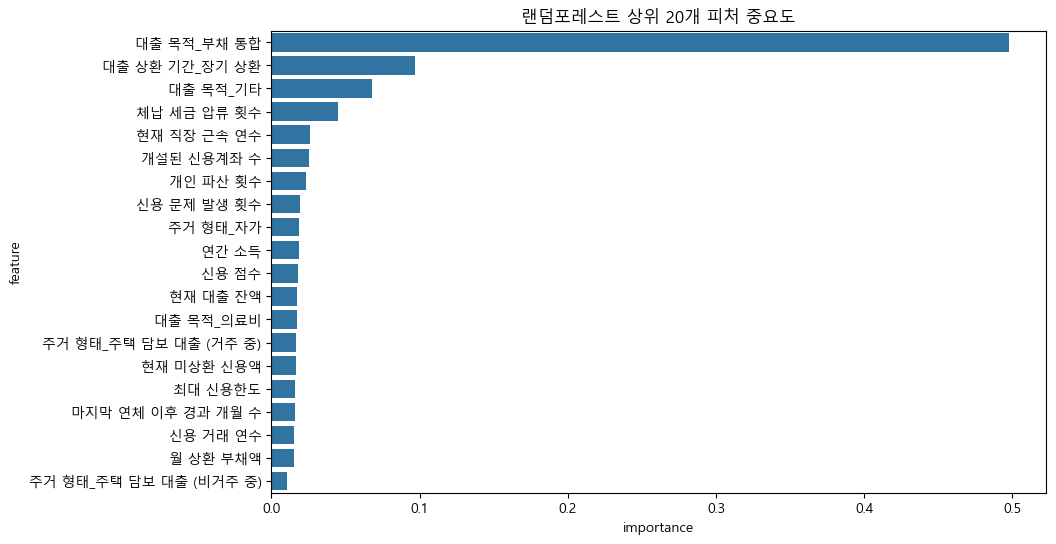

In [21]:
best_xgb = grid_search_xgb.best_estimator_

# 피처 중요도 추출
importances = best_xgb.feature_importances_
features = X_filtered.columns  # 학습에 사용한 feature 이름

# DataFrame으로 정리해서 정렬
importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(importance_df.head(20))

# 시각화 (상위 20개 피처)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df.head(20))
plt.title('랜덤포레스트 상위 20개 피처 중요도')
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# RandomForest 하이퍼파라미터 그리드 설정
param_grid_rf = {
    'n_estimators': [180, 150],
    'max_depth': [8, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 3],
    'bootstrap': [True]
}

rf_model = RandomForestClassifier(random_state=53)

# GridSearchCV 설정: 5-fold CV, ROC-AUC 점수 사용
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring='roc_auc',
    verbose=1
)

grid_search_rf.fit(X_filtered, y)

print("Best parameters for RandomForest:", grid_search_rf.best_params_)
print("Best CV ROC-AUC for RandomForest:", grid_search_rf.best_score_)


Fitting 4 folds for each of 16 candidates, totalling 64 fits
Best parameters for RandomForest: {'bootstrap': True, 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 180}
Best CV ROC-AUC for RandomForest: 0.739531038351018


In [19]:
test_pred = grid_search_rf.predict_proba(test_filtered)[:, 1]  # 양성 클래스(채무 불이행)의 확률

submission = pd.DataFrame({
    'UID': test_ids,
    '채무 불이행 확률': test_pred
})

submission.to_csv('/data/submission.csv', index=False)
print("submission.csv 파일이 '/data' 경로에 저장되었습니다.")

submission.csv 파일이 '/data' 경로에 저장되었습니다.


In [20]:
submission[submission['채무 불이행 확률'] < 0.5]

,UID,채무 불이행 확률
0,TEST_0000,0.347557
1,TEST_0001,0.349961
2,TEST_0002,0.364614
3,TEST_0003,0.272191
4,TEST_0004,0.259817
...,...,...
2056,TEST_2056,0.374905
2057,TEST_2057,0.129017
2058,TEST_2058,0.209011
2059,TEST_2059,0.335379


                   feature  importance
3               개설된 신용계좌 수    0.145248
0                    연간 소득    0.120512
17             대출 목적_부채 통합    0.107051
12                   신용 점수    0.089683
9                 현재 대출 잔액    0.089427
10              현재 미상환 신용액    0.086616
4                 신용 거래 연수    0.065230
5                  최대 신용한도    0.052046
11                월 상환 부채액    0.046698
7        마지막 연체 이후 경과 개월 수    0.043412
19          대출 상환 기간_장기 상환    0.041497
6              신용 문제 발생 횟수    0.032359
8                 개인 파산 횟수    0.029889
1              현재 직장 근속 연수    0.026901
2              체납 세금 압류 횟수    0.006716
14   주거 형태_주택 담보 대출 (거주 중)    0.006030
16                대출 목적_기타    0.004709
13                주거 형태_자가    0.004706
18               대출 목적_의료비    0.000899
15  주거 형태_주택 담보 대출 (비거주 중)    0.000370


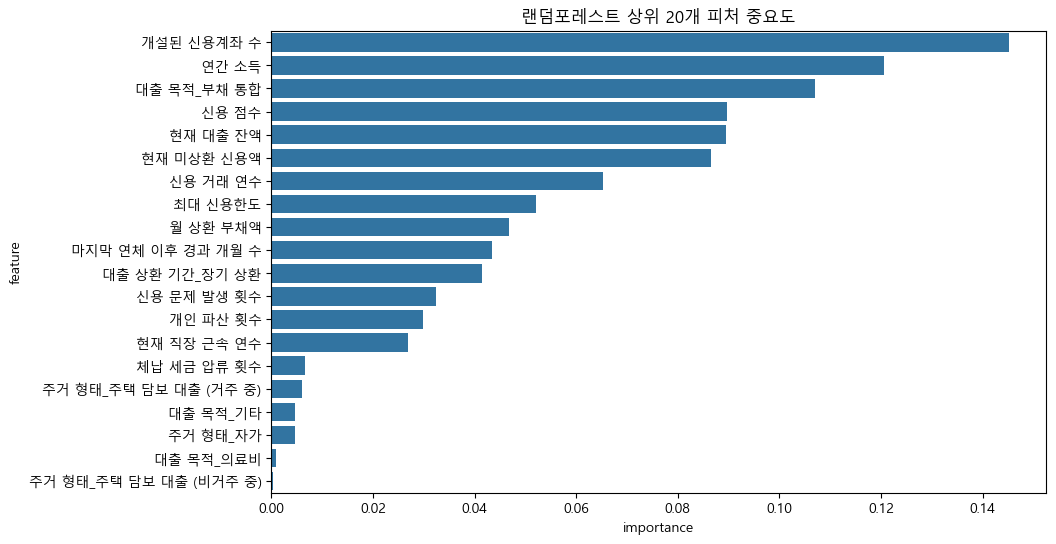

In [25]:
# grid_search_rf 는 GridSearchCV를 사용해 튜닝한 RandomForestClassifier라고 가정합니다.
best_rf = grid_search_rf.best_estimator_

# 피처 중요도 추출
importances = best_rf.feature_importances_
features = X_filtered.columns  # 학습에 사용한 feature 이름

# DataFrame으로 정리해서 정렬
importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(importance_df.head(20))

# 시각화 (상위 20개 피처)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df.head(20))
plt.title('랜덤포레스트 상위 20개 피처 중요도')
plt.show()


In [23]:
import numpy as np
import pandas as pd

# 예: 모델1과 모델2의 예측 결과 (예측 확률)
pred_xgb = grid_search_xgb.predict_proba(test_filtered)[:, 1]
pred_rf = grid_search_rf.predict_proba(test_filtered)[:, 1]

# 상관계수 계산
corr = np.corrcoef(pred_xgb, pred_rf)[0, 1]
print("모델1과 모델2의 예측 상관계수:", corr)


모델1과 모델2의 예측 상관계수: 0.9559347356832805


모델1과 모델2의 예측 상관계수: 0.9559347356832805
두 모델이 동일하게 예측한 개수: 1975
두 모델이 다르게 예측한 개수: 87


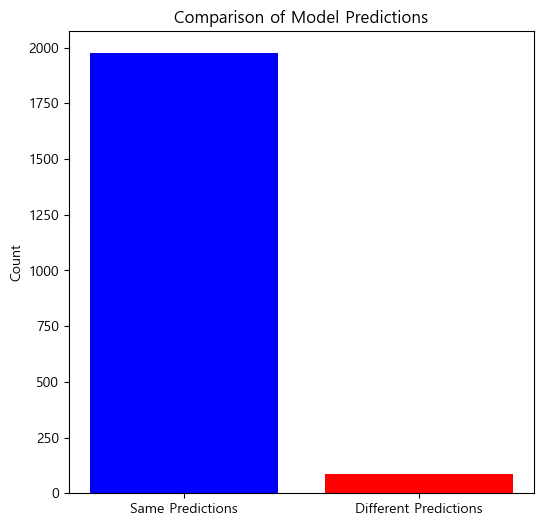

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 예: 모델1과 모델2의 예측 결과 (예측 확률)
pred_xgb = grid_search_xgb.predict_proba(test_filtered)[:, 1]
pred_rf = grid_search_rf.predict_proba(test_filtered)[:, 1]

# 상관계수 계산
corr = np.corrcoef(pred_xgb, pred_rf)[0, 1]
print("모델1과 모델2의 예측 상관계수:", corr)

# 0.5 기준으로 이진 분류 변환
pred_xgb_bin = (pred_xgb >= 0.5).astype(int)
pred_rf_bin = (pred_rf >= 0.5).astype(int)

# 두 모델의 예측값 비교
same_predictions = np.sum(pred_xgb_bin == pred_rf_bin)
diff_predictions = np.sum(pred_xgb_bin != pred_rf_bin)

print(f"두 모델이 동일하게 예측한 개수: {same_predictions}")
print(f"두 모델이 다르게 예측한 개수: {diff_predictions}")

# 시각화
labels = ['Same Predictions', 'Different Predictions']
values = [same_predictions, diff_predictions]
plt.figure(figsize=(6, 6))
plt.bar(labels, values, color=['blue', 'red'])
plt.ylabel("Count")
plt.title("Comparison of Model Predictions")
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# LGBMClassifier 사용 (scikit-learn API)
lgb_model = lgb.LGBMClassifier(random_state=31)

# 그리드 서치 파라미터 설정
param_grid = {
    'num_leaves': [13, 12],
    'max_depth': [5, 6],
    'learning_rate': [0.04, 0.03],
    'n_estimators': [150, 180]
}

grid_search_lgb = GridSearchCV(lgb_model, param_grid, cv=5, scoring='roc_auc', verbose=1)
grid_search_lgb.fit(X_filtered, y)

print("Best parameters:", grid_search_lgb.best_params_)
print("Best CV ROC-AUC:", grid_search_lgb.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2730, number of negative: 5270
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1851
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.341250 -> initscore=-0.657729
[LightGBM] [Info] Start training from score -0.657729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines

In [28]:
test_pred = grid_search_lgb.predict_proba(test_filtered)[:, 1]  # 양성 클래스(채무 불이행)의 확률

submission = pd.DataFrame({
    'UID': test_ids,
    '채무 불이행 확률': test_pred
})

# 6. submission 파일 저장
submission.to_csv('/data/submission.csv', index=False)
print("submission.csv 파일이 '/data' 경로에 저장되었습니다.")

submission.csv 파일이 '/data' 경로에 저장되었습니다.


In [29]:
submission[submission['채무 불이행 확률'] < 0.5]

,UID,채무 불이행 확률
0,TEST_0000,0.292098
1,TEST_0001,0.291140
2,TEST_0002,0.396838
3,TEST_0003,0.230218
4,TEST_0004,0.299784
...,...,...
2056,TEST_2056,0.305451
2057,TEST_2057,0.105534
2058,TEST_2058,0.178437
2059,TEST_2059,0.250034


In [30]:
import numpy as np
import pandas as pd

# 예: 모델1과 모델2의 예측 결과 (예측 확률)
pred_xgb = grid_search_xgb.predict_proba(test_filtered)[:, 1]
pred_lgb = grid_search_lgb.predict_proba(test_filtered)[:, 1]

# 상관계수 계산
corr = np.corrcoef(pred_xgb, pred_lgb)[0, 1]
print("모델1과 모델2의 예측 상관계수:", corr)


모델1과 모델2의 예측 상관계수: 0.9794789244868908


In [31]:
import numpy as np
import pandas as pd

# 예: 모델1과 모델2의 예측 결과 (예측 확률)
pred_rf = grid_search_rf.predict_proba(test_filtered)[:, 1]
pred_lgb = grid_search_lgb.predict_proba(test_filtered)[:, 1]

# 상관계수 계산
corr = np.corrcoef(pred_rf, pred_lgb)[0, 1]
print("모델1과 모델2의 예측 상관계수:", corr)


모델1과 모델2의 예측 상관계수: 0.9548489937658446


모델1과 모델2의 예측 상관계수: 0.9794789244868908
두 모델이 동일하게 예측한 개수: 2001
두 모델이 다르게 예측한 개수: 61


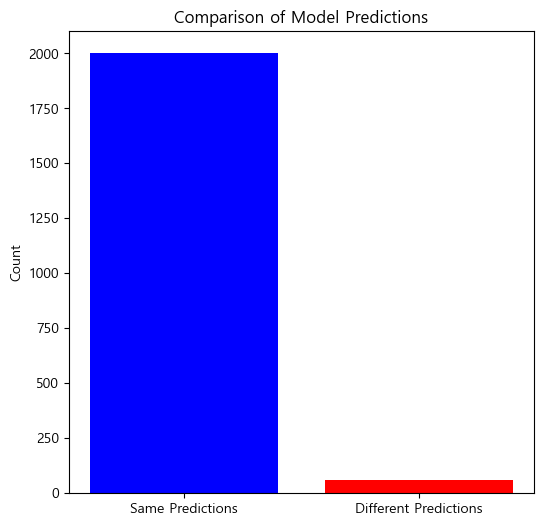

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 예: 모델1과 모델2의 예측 결과 (예측 확률)
pred_xgb = grid_search_xgb.predict_proba(test_filtered)[:, 1]
pred_lgb = grid_search_lgb.predict_proba(test_filtered)[:, 1]

# 상관계수 계산
corr = np.corrcoef(pred_xgb, pred_lgb)[0, 1]
print("모델1과 모델2의 예측 상관계수:", corr)

# 0.5 기준으로 이진 분류 변환
pred_xgb_bin = (pred_xgb >= 0.5).astype(int)
pred_lgb_bin = (pred_lgb >= 0.5).astype(int)

# 두 모델의 예측값 비교
same_predictions = np.sum(pred_xgb_bin == pred_lgb_bin)
diff_predictions = np.sum(pred_xgb_bin != pred_lgb_bin)

print(f"두 모델이 동일하게 예측한 개수: {same_predictions}")
print(f"두 모델이 다르게 예측한 개수: {diff_predictions}")

# 시각화
labels = ['Same Predictions', 'Different Predictions']
values = [same_predictions, diff_predictions]
plt.figure(figsize=(6, 6))
plt.bar(labels, values, color=['blue', 'red'])
plt.ylabel("Count")
plt.title("Comparison of Model Predictions")
plt.show()

모델1과 모델2의 예측 상관계수: 0.9548489937658446
두 모델이 동일하게 예측한 개수: 1970
두 모델이 다르게 예측한 개수: 92


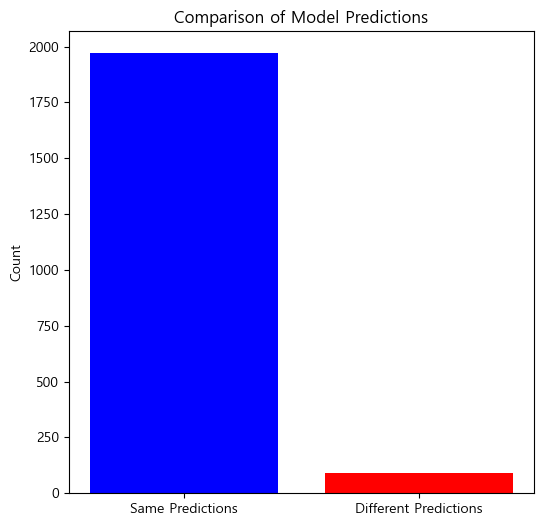

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 예: 모델1과 모델2의 예측 결과 (예측 확률)
pred_rf = grid_search_rf.predict_proba(test_filtered)[:, 1]
pred_lgb = grid_search_lgb.predict_proba(test_filtered)[:, 1]

# 상관계수 계산
corr = np.corrcoef(pred_rf, pred_lgb)[0, 1]
print("모델1과 모델2의 예측 상관계수:", corr)

# 0.5 기준으로 이진 분류 변환
pred_rf_bin = (pred_rf >= 0.5).astype(int)
pred_lgb_bin = (pred_lgb >= 0.5).astype(int)

# 두 모델의 예측값 비교
same_predictions = np.sum(pred_rf_bin == pred_lgb_bin)
diff_predictions = np.sum(pred_rf_bin != pred_lgb_bin)

print(f"두 모델이 동일하게 예측한 개수: {same_predictions}")
print(f"두 모델이 다르게 예측한 개수: {diff_predictions}")

# 시각화
labels = ['Same Predictions', 'Different Predictions']
values = [same_predictions, diff_predictions]
plt.figure(figsize=(6, 6))
plt.bar(labels, values, color=['blue', 'red'])
plt.ylabel("Count")
plt.title("Comparison of Model Predictions")
plt.show()